# Dragon Real Estate_Price Prediction ML Model

## 0. Import Libraries and Dataset

In [1]:
# import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# read housing dataset
housing = pd.read_csv('housing data.csv')
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# print all columns in the dataset
housing.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

## Relevant Information on the Dataset

The dataset concerns housing values in suburbs of Boston.

1. Number of Instances 506

2. Number of Attributes 13 continuous attributes (including "class"
                         attribute "MEDV"), 1 binary-valued attribute.

3. Attribute Information

    1. **CRIM** - per capita crime rate by town
    2. **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.
    3. **INDUS** - proportion of non-retail business acres per town
    4. **CHAS** - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. **NOX** - nitric oxides concentration (parts per 10 million)
    6. **RM** - average number of rooms per dwelling
    7. **AGE** - proportion of owner-occupied units built prior to 1940
    8. **DIS** - weighted distances to five Boston employment centres
    9. **RAD** - index of accessibility to radial highways
    10. **TAX** - full-value property-tax rate per USD 10,000
    11. **PTRATIO** - pupil-teacher ratio by town
    12. **B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. **LSTAT** - % lower status of the population
    14. **MEDV** - Median value of owner-occupied homes in USD 1000's

## 1. Exploratory Data Analysis

In [4]:
# calculate dimensions of the dataset
print('# rows in dataset    : ',housing.shape[0])
print('# columns in dataset : ',housing.shape[1])

# rows in dataset    :  506
# columns in dataset :  14


In [5]:
# print information on dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


Therefore, there are no missing cells in the dataset

In [6]:
# describe statistical information of the dataset
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002945FE81908>,
      dtype=object)

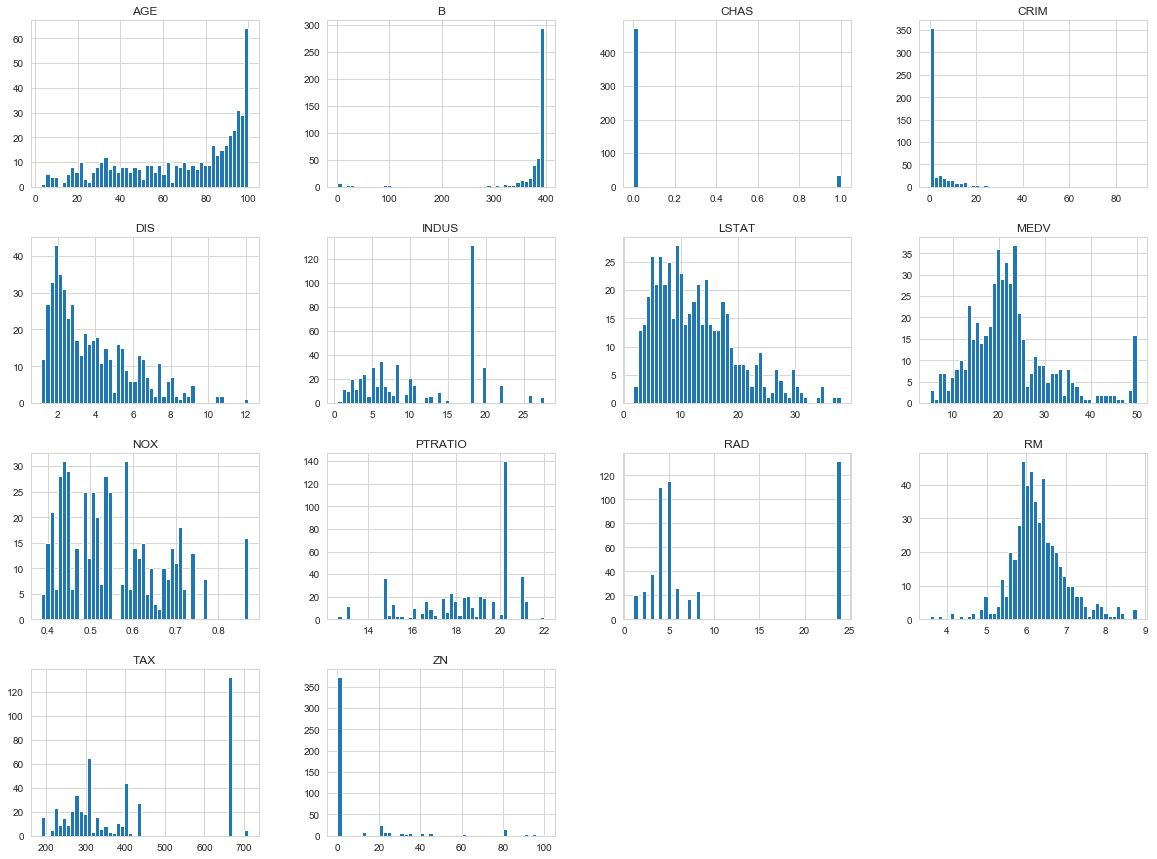

In [7]:
# print a histogram of the dataset
housing.hist(bins=50, figsize=(20,15))

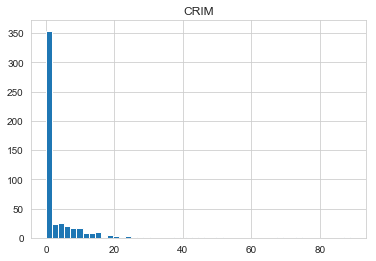

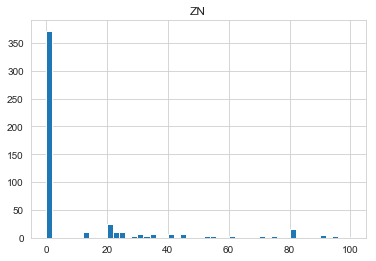

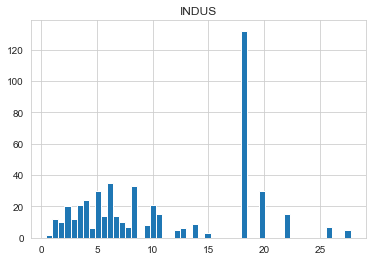

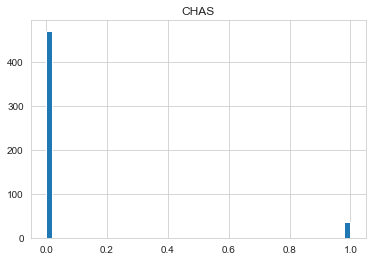

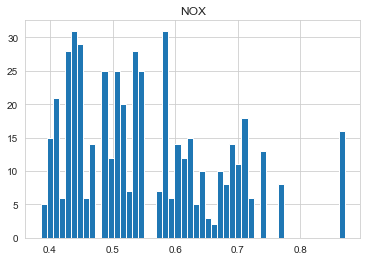

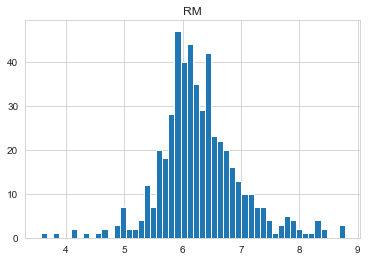

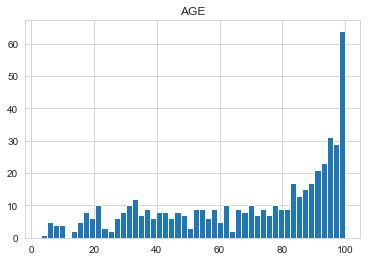

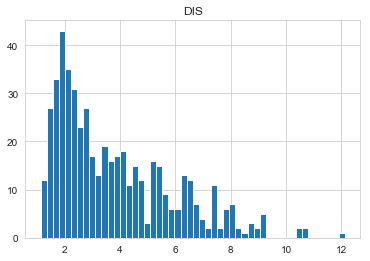

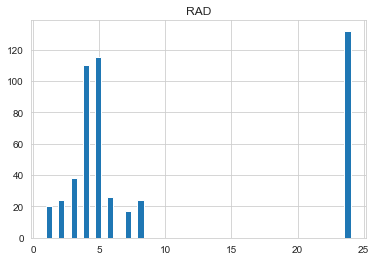

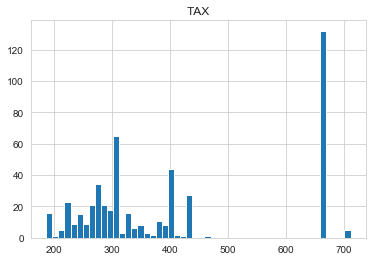

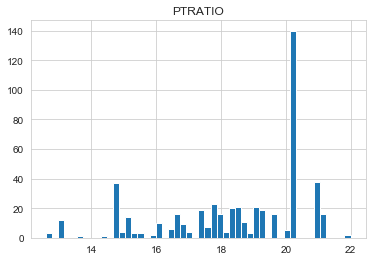

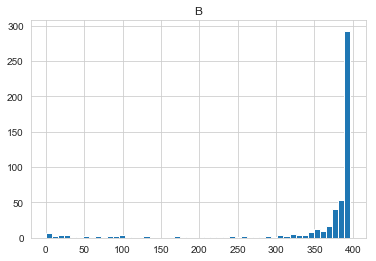

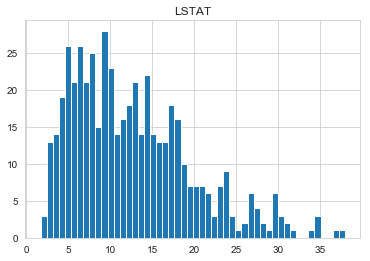

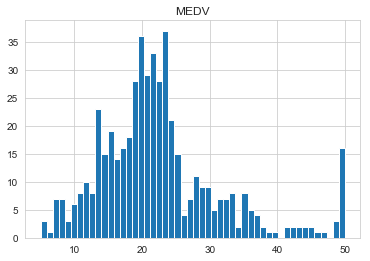

In [8]:
# another way to print the histogram for all columns
for i in housing.columns:
    housing.hist(i, bins=50)

Observations:
    1. Maximum houses are very old, i.e. AGE>70 with the maximum number of houses in the 100 years bracket.
    2. CHAS - Maximum entries have a 0 value and very negligible values are 1
    3. CRIM - Crime Rate is very low, maximum entries have 0 CRIM, while other majority ranging up to a CRIM = 10

## 2. Train Test Splitting

In [9]:
# import train_test_split module from the sklearn library
from sklearn.model_selection import train_test_split

# split dataset in the train and test split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# print the number of rows in train and test sets
print(f'# rows in train_set : {len(train_set)}\n# rows in test_set  : {len(test_set)}')

# rows in train_set : 404
# rows in test_set  : 102


In [10]:
train_set['CHAS'].value_counts()

0    375
1     29
Name: CHAS, dtype: int64

In [11]:
375/29

12.931034482758621

In [12]:
test_set['CHAS'].value_counts()

0    96
1     6
Name: CHAS, dtype: int64

In [13]:
96/6

16.0

Assuming that the feature `CHAS` is extremely important for our dataset and predictions. <br>We would ideally want it to be split in equal proportions in both test and train sets. So that our predictions are on point.

As you can see above, that in the traditional train_test_split methodology, we haven't been able to split feature `CHAS` in equal proportions. <br>Therefore, to split `CHAS` in equal proportions, we will imply **StratifiedShuffleSplit**

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [15]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [16]:
376/28

13.428571428571429

In [17]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [18]:
95/7

13.571428571428571

As you can see now, with **StratifiedShuffleSplit**, we've split the feature `CHAS` into equal proportions.

## 3. Looking for Correlations

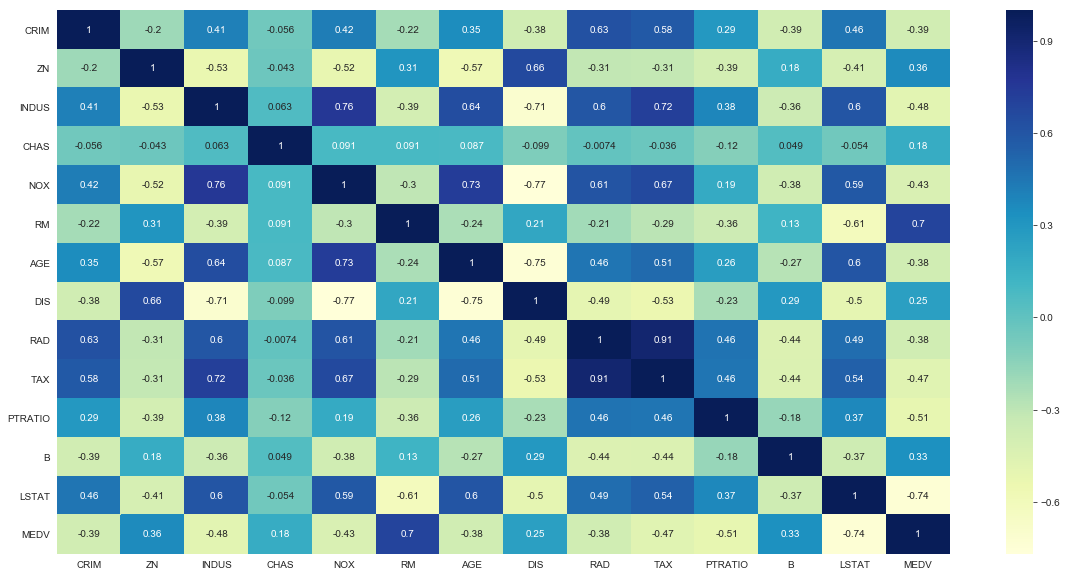

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(housing.corr(), cmap="YlGnBu", annot = True)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000294682C6C88>,
      dtype=object)

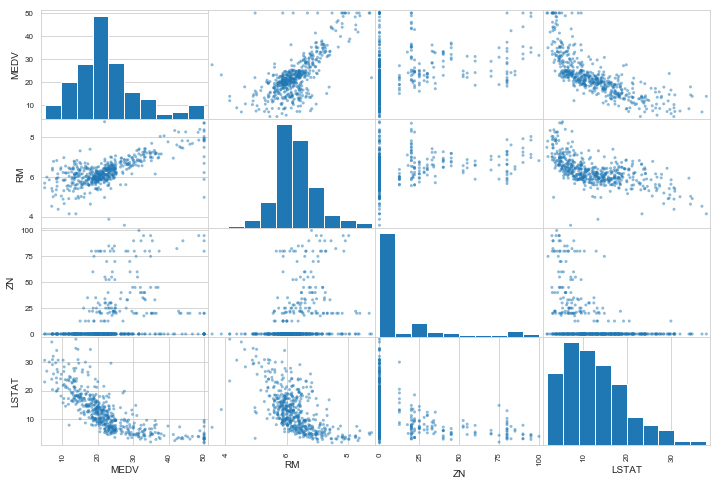

In [20]:
# plotting scatter plots for features that have strong correlation amongnst themselves
from pandas.plotting import scatter_matrix
attr = ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attr], figsize=(12,8))

Observations:
    1. Maximum values of `ZN` are in the 0 bin.
    2. `MEDV` has strong negative correlation with `LSTAT`
    3. `MEDV` has strong positive correlation with `RM`

Let's plot these individually for greater insights

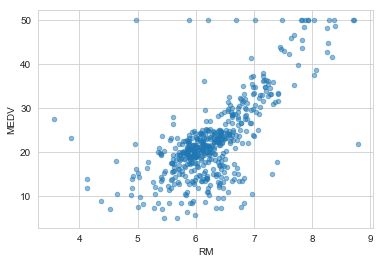

In [21]:
housing.plot(kind='scatter',x='RM', y='MEDV', alpha=0.5)

We can observe that there are multiple outliers in the scatter plot which can be removed for a better analysis.

In [22]:
# creating a new feature TPM = Tax per Room
housing['TPM'] = housing['TAX']/housing['RM']

In [23]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TPM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984


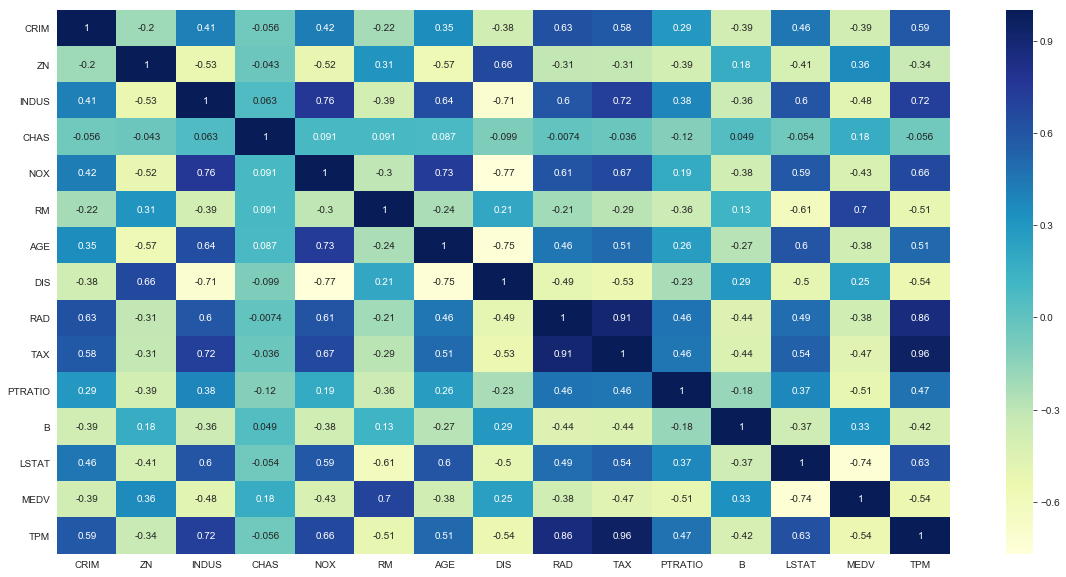

In [24]:
# re-calculating the correlations
plt.figure(figsize=(20,10))
sns.heatmap(housing.corr(), cmap="YlGnBu", annot = True)
plt.show()

TPM has a high negative correlation (-0.54) with MEDV, which is a great insight for us.

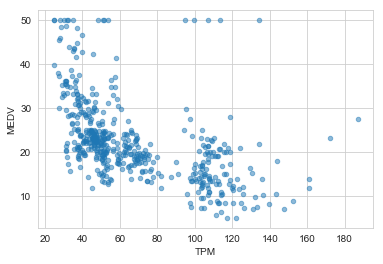

In [25]:
housing.plot(kind='scatter', x='TPM', y='MEDV', alpha=0.5)

As expected, TPM shows high negative correlation with MEDV

## Missing Attributes

In [26]:
# Import SimpleImputer class from sklearn.impute library
from sklearn.impute import SimpleImputer

# initiate SimpleImputer to impute median in missing values
imputer = SimpleImputer(strategy='median')

# impute missing values with the median
imputer.fit(housing)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [27]:
# calculate the median that are to be imputed
imputer.statistics_

array([2.56510000e-01, 0.00000000e+00, 9.69000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.20850000e+00, 7.75000000e+01, 3.20745000e+00,
       5.00000000e+00, 3.30000000e+02, 1.90500000e+01, 3.91440000e+02,
       1.13600000e+01, 2.12000000e+01, 5.35914169e+01])

In [28]:
# calculated median for all 15 columns
imputer.statistics_.shape

(15,)

In [29]:
X = imputer.transform(housing)

In [30]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [31]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TPM
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,66.742592
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,31.352087
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,24.645639
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,43.569765
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,53.591417
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,97.919933
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,187.026116


## Scikit-learn Design

Primarily, there are three types of objects in the scikit-learn library
<br>
1. **Estimators**
    - estimates some parameter based on a parameter.
    - eg - Imputer
    - it has `fit()` and `transform()` method both.
    - Fit Method - Fits the dataset and calculates internal parameters.


2. **Transformers**
    - Transforms method takes input and returns output based on the learnings from `fit()`.
    - It also has a convenient function called `fit_tranform()` that first fits and then transforms.


3. **Predictors**
    - It has methods like - `fit()` and `predict()`
    - It also a has a score function that evaluates the predictions.
    - LinearRegression, Logistic Regression, KNN, SVM etc all of them are examples of predictors.

## Feature Scaling
Primarily, there are two types of feature scaling methods
1. **Min-max Scaliing (Normalization)**
    - (value-min)/(max-min)
    - sklearn provides a class called `MinMaxScaler` for Normalization
    
2. **Standardistaion**
    - (value-mean)/std
    - std = Standard Deviation
    - sklearn provides a class called `StandardScaler` for Normalization

## Creating a Pipeline

scikit-learn provides pipeline and serialisation as well

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    # ... you can add as many steps in the pipeline as required
    ('std_scaler', StandardScaler())
])

In [33]:
train_set = strat_train_set.drop("MEDV", axis=1)
train_labels = strat_train_set["MEDV"].copy()

In [34]:
train_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15


In [35]:
train_labels.head()

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

In [36]:
housing_num_tr = my_pipeline.fit_transform(train_set)

## Selecting a desired model for Dragon Real Estates

In [37]:
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# from sklearn.tree import DecisionTreeRegressor
# model = DecisionTreeRegressor()
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(housing_num_tr, train_labels)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [38]:
# let's grab some data for processing
some_data = train_set.iloc[:5]
some_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15


In [39]:
some_label = train_labels.iloc[:5]

In [40]:
prepared_data = my_pipeline.transform(some_data)

In [41]:
model.predict(prepared_data)

array([22.58, 25.52, 16.4 , 23.57, 23.49])

In [42]:
list(some_label)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evalaulting the model

In [43]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)

In [44]:
lin_mse = mean_squared_error(train_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [45]:
lin_mse

3.046236633663366

In [46]:
lin_rmse

1.7453471384407648

We are getting a high error and less accuracy with LinearRegression, therefore we changed the model to DecisionTreeRegression and got a better accuracy.
<br>However, we DecisionTreeRegression model is overfitting our data, which must be treated

We will utilise a better evaluation technique.
## Cross Validation

In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, train_labels, scoring='neg_mean_squared_error', cv=13)
rmse_scores = np.sqrt(-scores)

In [48]:
train_labels.shape

(404,)

In [49]:
rmse_scores

array([3.07092362, 3.33365488, 3.19960986, 5.07437522, 3.66567733,
       4.23486451, 3.38117178, 2.71046479, 5.61092569, 3.5023453 ,
       3.80602027, 2.91943156, 2.7488414 ])

Therefore, running the code for cross validation on both LinearRegression and DecisionTreeRegressor, the RMSE scores are nice.
<br>Although, DecisionTreeRegressor is performing much better.

In [50]:
# user defined function
def print_scores(scores):
    print('Scores              : ', scores)
    print('Mean                : ', scores.mean())
    print('Standard Deviation  : ', scores.std())

In [51]:
print_scores(rmse_scores)

Scores              :  [3.07092362 3.33365488 3.19960986 5.07437522 3.66567733 4.23486451
 3.38117178 2.71046479 5.61092569 3.5023453  3.80602027 2.91943156
 2.7488414 ]
Mean                :  3.635254322986632
Standard Deviation  :  0.8411883196733659


In [52]:
'''
Scores for RandomForestRegressor
    Mean                :  3.5183366447112263
    Standard Deviation  :  0.9711441161694241
'''

'\nScores for RandomForestRegressor\n    Mean                :  3.5183366447112263\n    Standard Deviation  :  0.9711441161694241\n'

In [53]:
'''
Scores for LinearRegression
    Mean                :  4.976469504915328
    Standard Deviation  :  1.1706481532815187
'''

'\nScores for LinearRegression\n    Mean                :  4.976469504915328\n    Standard Deviation  :  1.1706481532815187\n'

In [54]:
'''
Scores for DecisionTreeRegression
    Mean                :  4.495642851808269
    Standard Deviation  :  1.2656404636500798
'''

'\nScores for DecisionTreeRegression\n    Mean                :  4.495642851808269\n    Standard Deviation  :  1.2656404636500798\n'

### As we can see that `RandomForestRegressor` performs the best out the of the three models.

## Saving the Model

In [55]:
# create a job for your model
from joblib import dump,load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

In [56]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_prediction = model.predict(X_test_prepared)

In [57]:
final_mse = mean_squared_error(Y_test, final_prediction)
final_rmse = np.sqrt(final_mse)

In [58]:
final_rmse

3.184769822691966

Therefore, our final RMSE is 3.18, which is a great error score. Our model is performing very well indeed!

In [59]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])